In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
df = pd.read_csv('medical_conditions_dataset.csv')
df.head()

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic


In [42]:
df.describe()

,id,age,bmi,blood_pressure,glucose_levels
count,10000.00000,5445.000000,4652.000000,3766.000000,4756.000000
mean,5000.50000,53.541598,27.423420,135.209429,135.219608
std,2886.89568,20.925113,7.231257,26.041531,37.607638
min,1.00000,18.000000,15.012119,90.009620,70.015961
25%,2500.75000,35.000000,21.077894,113.107754,102.273703
50%,5000.50000,54.000000,27.326204,134.821040,135.436764
75%,7500.25000,72.000000,33.689330,157.949509,168.349011
max,10000.00000,89.000000,39.998687,179.999359,199.890429


In [43]:
print(df.isnull().sum())

id                   0
full_name            0
age               4555
gender               0
smoking_status       0
bmi               5348
blood_pressure    6234
glucose_levels    5244
condition            0
dtype: int64


In [44]:
print(df['condition'].value_counts(normalize=True))

condition
Diabetic     0.6013
Pneumonia    0.2527
Cancer       0.1460
Name: proportion, dtype: float64


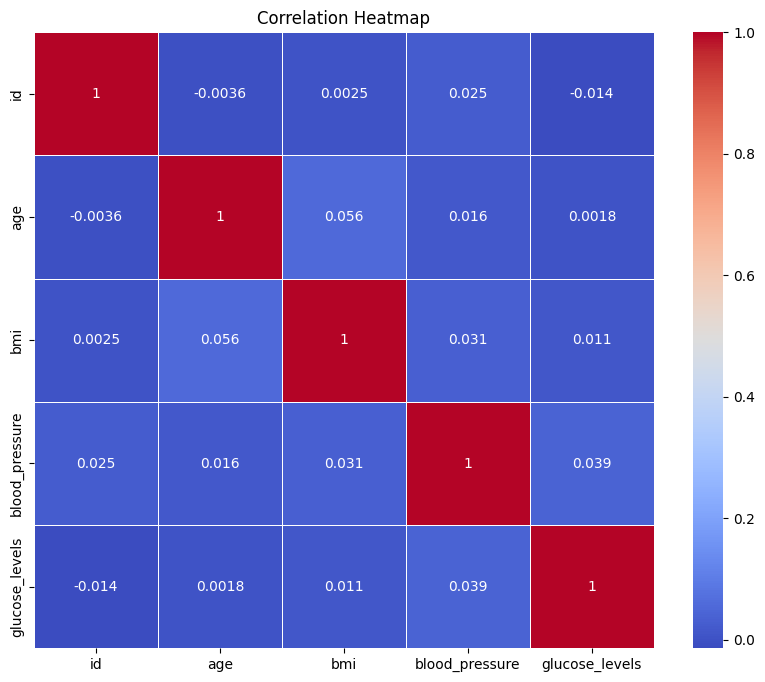

In [45]:
# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

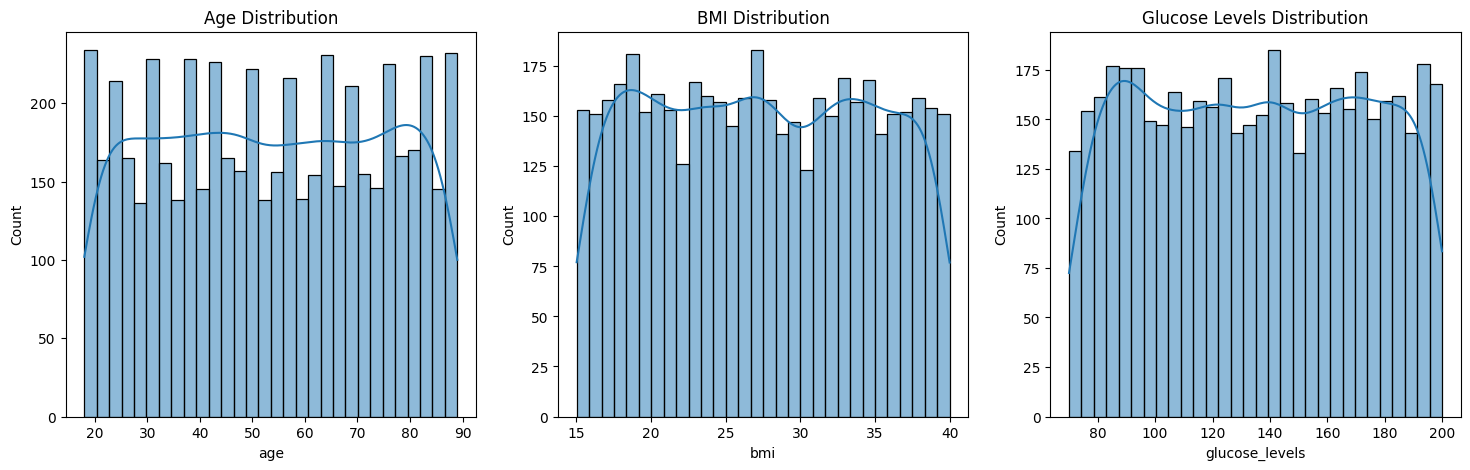

In [46]:
# Plot distributions of age, BMI, and glucose levels
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0]).set_title('Age Distribution')
sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[1]).set_title('BMI Distribution')
sns.histplot(df['glucose_levels'], bins=30, kde=True, ax=axes[2]).set_title('Glucose Levels Distribution')
plt.show()

In [47]:
df['gender_smoking'] = df['gender'] + ' - ' + df['smoking_status']
df.head()


,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition,gender_smoking
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia,male - Non-Smoker
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic,male - Non-Smoker
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia,male - Non-Smoker
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia,male - Non-Smoker
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic,male - Non-Smoker


In [48]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

df[['age', 'bmi']] = mean_imputer.fit_transform(df[['age', 'bmi']])
print(df[["age", "bmi"]].isna().sum())

df['blood_pressure'] = df.groupby("gender_smoking")['blood_pressure'].transform(lambda x: x.fillna(x.mean()))
print(df[['blood_pressure']].isna().sum())

df['glucose_levels'] = df.groupby("gender_smoking")['glucose_levels'].transform(lambda x: x.fillna(x.mean()))
print(df[['glucose_levels']].isna().sum())

age    0
bmi    0
dtype: int64
blood_pressure    0
dtype: int64
glucose_levels    0
dtype: int64


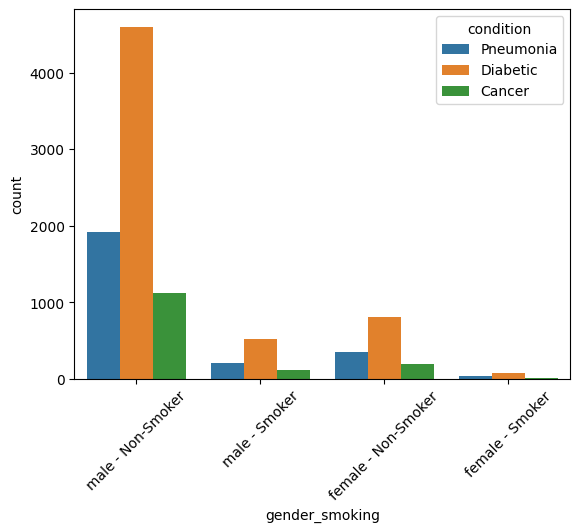

In [49]:
sns.countplot(data=df, x='gender_smoking', hue='condition')
plt.xticks(rotation=45)
plt.show()

In [50]:

df = df.drop('id', axis=1)
df = df.drop('full_name', axis=1)
df

,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition,gender_smoking
0,53.541598,male,Non-Smoker,27.423420,135.170455,135.382369,Pneumonia,male - Non-Smoker
1,30.000000,male,Non-Smoker,27.423420,105.315064,135.382369,Diabetic,male - Non-Smoker
2,18.000000,male,Non-Smoker,35.612486,135.170455,135.382369,Pneumonia,male - Non-Smoker
3,53.541598,male,Non-Smoker,27.423420,99.119829,135.382369,Pneumonia,male - Non-Smoker
4,76.000000,male,Non-Smoker,27.423420,135.170455,135.382369,Diabetic,male - Non-Smoker
...,...,...,...,...,...,...,...,...
9995,53.541598,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia,male - Non-Smoker
9996,53.541598,male,Non-Smoker,27.017487,135.170455,135.382369,Diabetic,male - Non-Smoker
9997,23.000000,male,Smoker,27.423420,148.833321,173.931480,Pneumonia,male - Smoker
9998,53.541598,female,Non-Smoker,27.423420,135.346334,133.325376,Pneumonia,female - Non-Smoker


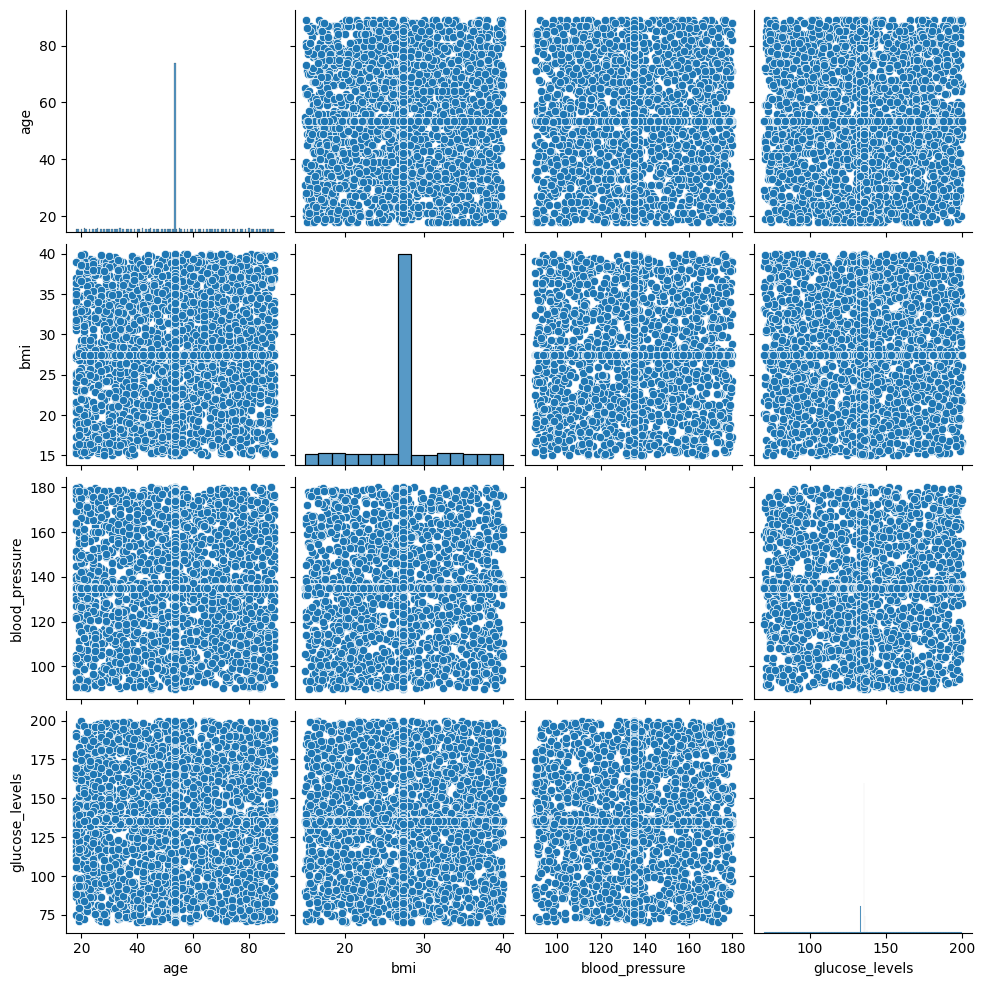

In [51]:
sns.pairplot(df)
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df

,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition,gender_smoking
0,53.541598,1,0,27.423420,135.170455,135.382369,2,2
1,30.000000,1,0,27.423420,105.315064,135.382369,1,2
2,18.000000,1,0,35.612486,135.170455,135.382369,2,2
3,53.541598,1,0,27.423420,99.119829,135.382369,2,2
4,76.000000,1,0,27.423420,135.170455,135.382369,1,2
...,...,...,...,...,...,...,...,...
9995,53.541598,1,0,25.029002,152.540355,137.551451,2,2
9996,53.541598,1,0,27.017487,135.170455,135.382369,1,2
9997,23.000000,1,1,27.423420,148.833321,173.931480,2,3
9998,53.541598,0,0,27.423420,135.346334,133.325376,2,0


In [53]:
X = df.iloc[:,0 :4]
y = df["condition"]


In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [55]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix,

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.6043333333333333,
 array([[   0,  429,    0],
        [   0, 1813,    0],
        [   0,  758,    0]]))

In [57]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       429\n           1       0.60      1.00      0.75      1813\n           2       0.00      0.00      0.00       758\n\n    accuracy                           0.60      3000\n   macro avg       0.20      0.33      0.25      3000\nweighted avg       0.37      0.60      0.46      3000\n'

In [61]:
#              precision    recall  f1-score   support
#
#           0       0.00      0.00      0.00       429
#           1       0.60      1.00      0.75      1813
#           2       0.00      0.00      0.00       758
#
#    accuracy                           0.60      3000
#   macro avg       0.20      0.33      0.25      3000
#weighted avg       0.37      0.60      0.46      3000


In [60]:
import pickle
# Save the model to a file
with open("health_risk_model.pkl", "wb") as f:
    pickle.dump(model, f)
